In [1]:
import pyiaea
from ROOT import *
from iaea.utils import Reader
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm, rankdata

Welcome to JupyROOT 6.24/02


# Eksploracja przestrzeni fazowych

In [30]:
data = "/mnt/c/Users/dawid/Desktop/CSVtoPHSP/E6.1_s0.5"
reader = Reader(data)
stat = 2000000
data = reader.GetParticles(stat)

[INFO]:: Total number of particles in file E6.1_s0.5.IAEAphsp = 35159414
[INFO]:: Number of original histories in header file E6.1_s0.5.IAEAphsp = 50000000
[INFO]:: The number of Extra Floats is 0 and the number of Extra Ints is 6
[INFO]:: Reading 2000000 particles from phsp... (first evt no. = 1)
[INFO]:: 0% particles read-in (evt no. = 1)
[INFO]:: 10% particles read-in (evt no. = 132596)
[INFO]:: 20% particles read-in (evt no. = 264834)
[INFO]:: 30% particles read-in (evt no. = 397065)
[INFO]:: 40% particles read-in (evt no. = 529120)
[INFO]:: 50% particles read-in (evt no. = 661405)
[INFO]:: 60% particles read-in (evt no. = 793860)
[INFO]:: 70% particles read-in (evt no. = 926009)
[INFO]:: 80% particles read-in (evt no. = 1058822)
[INFO]:: 90% particles read-in (evt no. = 1191257)


In [31]:
histX1 =  TH1D('h',"X",100, data["X"].min(),data["X"].max())
histY1 = TH1D('h',"Y",100, data["Y"].min(),data["Y"].max())
histW1 =  TH1D('h',"W",30, data["W"].min(),data["W"].max())
histU1 = TH1D('h',"U",100, data["U"].min(), data["U"].max())
histV1 =  TH1D('h',"V",100, data["V"].min(), data["V"].max())
histE1 = TH1D('h',"E",100,data["E"].min(), data["E"].max())
histPx1 = TH1D('h',"Px",100,data["Px"].min(), data["Px"].max())
histPy1 = TH1D('h',"Py",100,data["Py"].min(), data["Py"].max())
histPz1 = TH1D('h',"Pz",100,data["Pz"].min(), data["Pz"].max())
histTheta1 =  TH1D('h',"Theta",100,data["Theta"].min(), data["Theta"].max())

for index, row in data.iterrows():
  histX1.Fill(row["X"])
  histY1.Fill(row["Y"])
  histW1.Fill(row["W"])
  histU1.Fill(row["U"])
  histV1.Fill(row["V"])
  histE1.Fill(row["E"])
  histPx1.Fill(row["Px"])
  histPy1.Fill(row["Py"])
  histPz1.Fill(row["Pz"])
  histTheta1.Fill(row["Theta"])


Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).


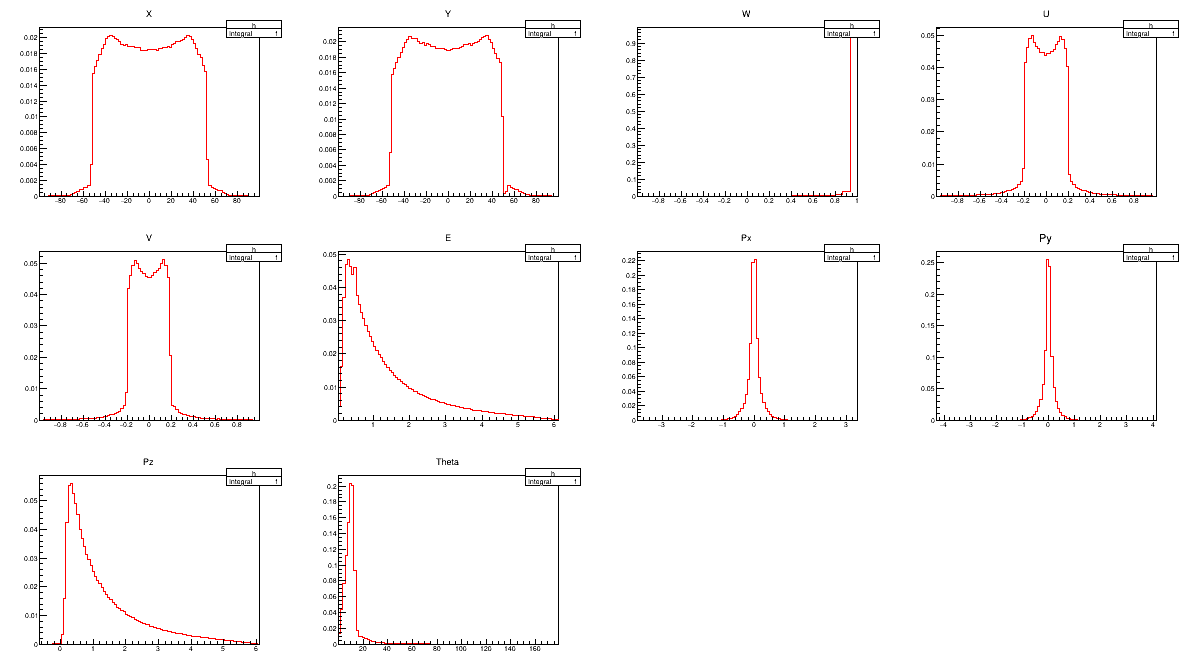

In [32]:
cs = TCanvas("cs","cs",10,10,1200,700)
cs.Divide(4,3)
cs.cd(1)
histX1.DrawNormalized().SetLineColor(2)
cs.cd(2)
histY1.DrawNormalized().SetLineColor(2)
cs.cd(3)
histW1.DrawNormalized().SetLineColor(2)
cs.cd(4)
histU1.DrawNormalized().SetLineColor(2)
cs.cd(5)
histV1.DrawNormalized().SetLineColor(2)
cs.cd(6)
histE1.DrawNormalized().SetLineColor(2)
cs.cd(7)
histPx1.DrawNormalized().SetLineColor(2)
cs.cd(8)
histPy1.DrawNormalized().SetLineColor(2)
cs.cd(9)
histPz1.DrawNormalized().SetLineColor(2)
cs.cd(10)
histTheta1.DrawNormalized().SetLineColor(2)
cs.Draw()

# Preselekcja danych

In [4]:
# PRESELEKCJA DANYCH
data = data[data["Particle"]=="gamma"] 
data = data.drop_duplicates(subset=['EvtId'])
data = data[data["Theta"]<15] # odrzucenie fotonów rozproszonych
data = data[data["X"].between(-55,55)]
data = data[data["Y"].between(-55,55)]
data = data.reset_index()

#Macierz korelacji dla wszystkich zmiennych


In [5]:
data.corr(method='spearman').style.background_gradient(cmap='coolwarm').set_precision(4)

/tmp/ipykernel_660/120991540.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  data.corr(method='spearman').style.background_gradient(cmap='coolwarm').set_precision(4)


,index,EvtId,X,Y,Z,E,Ekin,Px,Py,Pz,U,V,W,Theta
index,1.0000,1.0000,-0.0002,-0.0002,0.0001,-0.0010,-0.0010,-0.0004,-0.0001,-0.0010,-0.0002,-0.0004,0.0004,-0.0004
EvtId,1.0000,1.0000,-0.0002,-0.0002,0.0001,-0.0010,-0.0010,-0.0004,-0.0001,-0.0010,-0.0002,-0.0004,0.0004,-0.0004
X,-0.0002,-0.0002,1.0000,-0.0005,0.0004,0.0008,0.0008,0.8792,0.0001,0.0008,0.9818,-0.0006,-0.0005,0.0005
Y,-0.0002,-0.0002,-0.0005,1.0000,0.0588,0.0028,0.0028,0.0002,0.8786,0.0032,-0.0003,0.9811,0.0500,-0.0500
Z,0.0001,0.0001,0.0004,0.0588,1.0000,-0.0070,-0.0070,0.0009,0.0395,-0.0073,0.0009,0.0573,-0.0369,0.0369
E,-0.0010,-0.0010,0.0008,0.0028,-0.0070,1.0000,1.0000,0.0001,-0.0158,1.0000,0.0009,0.0031,0.1316,-0.1316
Ekin,-0.0010,-0.0010,0.0008,0.0028,-0.0070,1.0000,1.0000,0.0001,-0.0158,1.0000,0.0009,0.0031,0.1316,-0.1316
Px,-0.0004,-0.0004,0.8792,0.0002,0.0009,0.0001,0.0001,1.0000,0.0004,0.0001,0.8916,0.0002,-0.0003,0.0003
Py,-0.0001,-0.0001,0.0001,0.8786,0.0395,-0.0158,-0.0158,0.0004,1.0000,-0.0155,0.0004,0.8916,0.0367,-0.0368
Pz,-0.0010,-0.0010,0.0008,0.0032,-0.0073,1.0000,1.0000,0.0001,-0.0155,1.0000,0.0009,0.0035,0.1395,-0.1395


In [33]:
cols =  ["X", "Y","E","U","V", "W"] 
data = data[cols]
df = data.copy()

# Macierz korelacji zmiennych tworzących model

In [34]:
df.corr(method='spearman').style.background_gradient(cmap='coolwarm').set_precision(4)

/tmp/ipykernel_660/1383582272.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df.corr(method='spearman').style.background_gradient(cmap='coolwarm').set_precision(4)


,X,Y,E,U,V,W
X,1.0000,0.0004,-0.0006,0.9066,0.0006,-0.0005
Y,0.0004,1.0000,0.0008,0.0004,0.9037,0.0404
E,-0.0006,0.0008,1.0000,-0.0006,0.0033,0.1458
U,0.9066,0.0004,-0.0006,1.0000,0.0008,-0.0005
V,0.0006,0.9037,0.0033,0.0008,1.0000,0.0419
W,-0.0005,0.0404,0.1458,-0.0005,0.0419,1.0000


# Klasa do rysowania histogramów w bibliotece ROOT

In [8]:
class Histograms:
  def __init__(self,data):
    self.data = data

  def get_hist(self, col, n=1000):   # stworzenie histogramów domyślnie na 1000 binów z mozliwoscia zmiany
    hist0 = TH1D('Stats',col,n,self.data[col].min(),self.data[col].max())
    for index, row in self.data.iterrows():
      hist0.Fill(row[col])
    return hist0

  def min_col(self,col):    # min i max do rysowania histogramów potrzebne
    return min(self.data[col])

  def max_col(self,col):
    return max(self.data[col])
hist = Histograms(df)

# Fitowanie funkcji do rozkładów statystycznych


****************************************
Minimizer is Linear / Migrad
Chi2                      =       117.35
NDf                       =           79
p0                        =      8391.71   +/-   26.2557     
p1                        =     -3.45418   +/-   3.09622     
p2                        =      1.16103   +/-   0.316577    
p3                        =    0.0199457   +/-   0.0144894   
p4                        =  -0.00140363   +/-   0.00097228  
p5                        = -3.18884e-05   +/-   2.13565e-05 
p6                        =  2.90603e-06   +/-   1.12938e-06 
p7                        =  1.90138e-08   +/-   1.21237e-08 
p8                        = -2.10081e-09   +/-   5.49224e-10 
p9                        = -3.75662e-12   +/-   2.32429e-12 
p10                       =  4.32945e-13   +/-   9.43796e-14 


Warning in <TROOT::Append>: Replacing existing TH1: Stats (Potential memory leak).


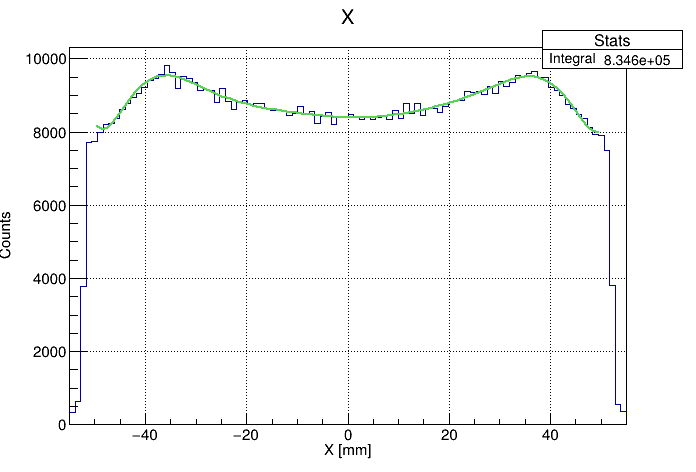

In [11]:
c2=TCanvas()
# Variable X, fit polynomial
histX = hist.get_hist('X',100)
f_x = TF1("f_x", "pol 10", -50,50)
f_x.SetLineColor(8)
histX.Fit(f_x, 'R')
histX.GetXaxis().SetTitle("X [mm]")
histX.GetXaxis().CenterTitle(True)
histX.GetYaxis().SetTitle("Counts")
histX.GetYaxis().CenterTitle(True)
gStyle.SetOptStat("in")
randX = histX


c2.SetGrid()
c2.Draw()


****************************************
Minimizer is Linear / Migrad
Chi2                      =      236.829
NDf                       =           79
p0                        =      8712.58   +/-   26.6799     
p1                        =     -6.26695   +/-   3.14592     
p2                        =     0.573902   +/-   0.321262    
p3                        =    0.0521997   +/-   0.0146519   
p4                        =   0.00232865   +/-   0.000983412 
p5                        = -9.95415e-05   +/-   2.15079e-05 
p6                        = -3.26537e-06   +/-   1.13832e-06 
p7                        =  6.75947e-08   +/-   1.21652e-08 
p8                        =  1.54115e-09   +/-   5.5175e-10  
p9                        = -1.49018e-11   +/-   2.32408e-12 
p10                       = -2.79761e-13   +/-   9.45159e-14 


Warning in <TROOT::Append>: Replacing existing TH1: Stats (Potential memory leak).


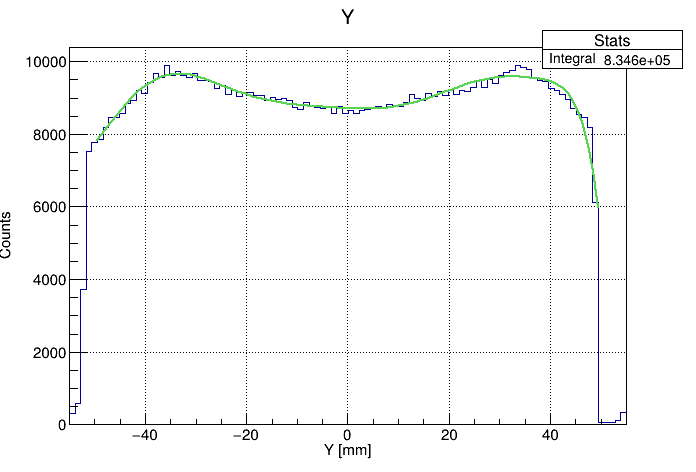

In [18]:
histY = hist.get_hist('Y',100)
fpol = TF1("fpol", "pol 10", -50,50)

c2=TCanvas()

fpol.SetLineColor(8)
histY.Fit(fpol, 'R')
histY.GetXaxis().SetTitle("Y [mm]")
histY.GetXaxis().CenterTitle(True)
histY.GetYaxis().SetTitle("Counts")
histY.GetYaxis().CenterTitle(True)
gStyle.SetOptStat("in")
randY = histY
c2.SetGrid()
c2.Draw()

 FCN=7331.64 FROM MIGRAD    STATUS=CONVERGED      94 CALLS          95 TOTAL
                     EDM=1.15189e-11    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   1.4 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.30516e+05   2.95117e+02   5.35762e-02   1.38196e-08
   2  MPV          9.86770e-01   2.68993e-05  -4.24305e-08  -4.33153e-01
   3  Sigma        7.32864e-03   1.45478e-05  -1.78277e-06   1.31991e-02
 FCN=7331.64 FROM HESSE     STATUS=FAILED         17 CALLS         591 TOTAL
                     EDM=4.13834e-11    STRATEGY= 1  ERROR MATRIX UNCERTAINTY 100.0 per cent
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           2.30516e+05   2.53631e+02   1.05946e+01   1.38197e-08
   2  p1           9.86770e-01   1.08566e-05   4.70529e-07  -4.33153e-01
   3  p

Warning in <TROOT::Append>: Replacing existing TH1: Stats (Potential memory leak).
Warning in <ROOT::Fit::FillData>: fit range is outside histogram range, no fit data for xaxis
Warning in <Fit>: Fit data is empty 
Warning in <ROOT::Fit::FillData>: fit range is outside histogram range, no fit data for xaxis
Warning in <Fit>: Fit data is empty 


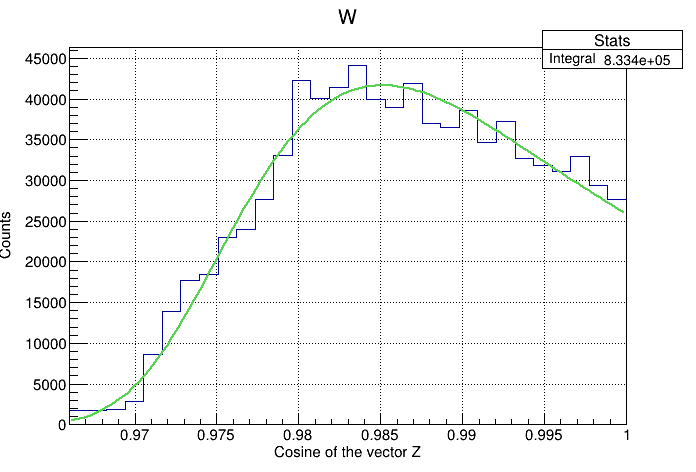

In [19]:
histW = hist.get_hist('W',30)
f_W1 = TF1("f_W1", "landau", df['W'].min(),df['W'].max())
f_W2= TF1("f_W2", "gaus",0,0.4)
f_W3= TF1("f_W3", "gaus",0,0.14)

c2=TCanvas()
histW.Fit(f_W1, 'R')
histW.Fit(f_W2, 'R+')
histW.Fit(f_W3, 'R+')

par_W = []
total_W = TF1( 'total', 'landau(0)+gaus(3)+gaus(6)',df['W'].min(),df['W'].max())

total_W.SetLineColor(8)
par_W_1 = f_W1.GetParameters()
par_W_2 = f_W2.GetParameters()
par_W_3 = f_W3.GetParameters()
par_W.append(par_W_1[0])
par_W.append(par_W_1[1])
par_W.append(par_W_1[2])
par_W.append(par_W_2[0])
par_W.append(par_W_2[1])
par_W.append(par_W_2[2])
par_W.append(par_W_3[0])
par_W.append(par_W_3[1])
par_W.append(par_W_3[2])

total_W.SetParameters(*par_W)
histW.Fit( total_W, 'R' )


histW.GetXaxis().SetTitle("Cosine of the vector Z")
histW.GetXaxis().CenterTitle(True)
histW.GetYaxis().SetTitle("Counts")
histW.GetYaxis().CenterTitle(True)
gStyle.SetOptStat("in")

randW = total_W
c2.SetGrid()
c2.Draw()


****************************************
Minimizer is Linear / Migrad
Chi2                      =      508.002
NDf                       =           63
p0                        =      10252.9   +/-   31.9646     
p1                        =     -3631.18   +/-   980.05      
p2                        =        20715   +/-   26014.2     
p3                        =  1.95292e+06   +/-   307684      
p4                        =  3.03104e+07   +/-   5.36464e+06 
p5                        = -2.51253e+08   +/-   3.03764e+07 
p6                        = -2.87771e+09   +/-   4.17632e+08 
p7                        =  1.14997e+10   +/-   1.15378e+09 
p8                        =  1.00521e+11   +/-   1.35985e+10 
p9                        = -1.70898e+11   +/-   1.47854e+10 
p10                       = -1.27085e+12   +/-   1.56348e+11 


Warning in <TROOT::Append>: Replacing existing TH1: Stats (Potential memory leak).


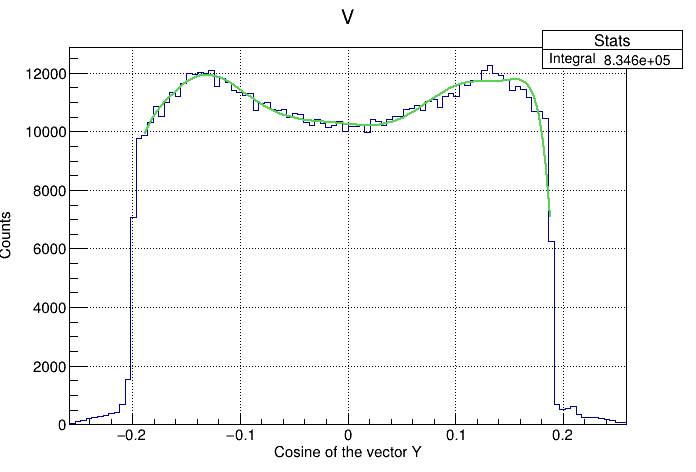

In [14]:
histV = hist.get_hist('V',100)
f_V = TF1("f_V", "pol 10", -0.19, 0.19)

f_V.SetLineColor(8)
c2=TCanvas()
histV.Fit(f_V, 'R')
randV = histV

histV.GetXaxis().SetTitle("Cosine of the vector Y")
histV.GetXaxis().CenterTitle(True)
histV.GetYaxis().SetTitle("Counts")
histV.GetYaxis().CenterTitle(True)
gStyle.SetOptStat("in")

c2.SetGrid()
c2.Draw()


****************************************
Minimizer is Linear / Migrad
Chi2                      =      461.324
NDf                       =           67
p0                        =      9942.93   +/-   30.5912     
p1                        =     -82.7052   +/-   889.353     
p2                        =     -62526.5   +/-   22376       
p3                        =      28998.5   +/-   251423      
p4                        =  4.23361e+07   +/-   4.15092e+06 
p5                        = -3.31519e+06   +/-   2.23229e+07 
p6                        = -3.29648e+09   +/-   2.90589e+08 
p7                        =  1.23033e+08   +/-   7.62249e+08 
p8                        =   9.8361e+10   +/-   8.50705e+09 
p9                        = -1.26632e+09   +/-   8.78039e+09 
p10                       = -1.06214e+12   +/-   8.79338e+10 


Warning in <TROOT::Append>: Replacing existing TH1: Stats (Potential memory leak).


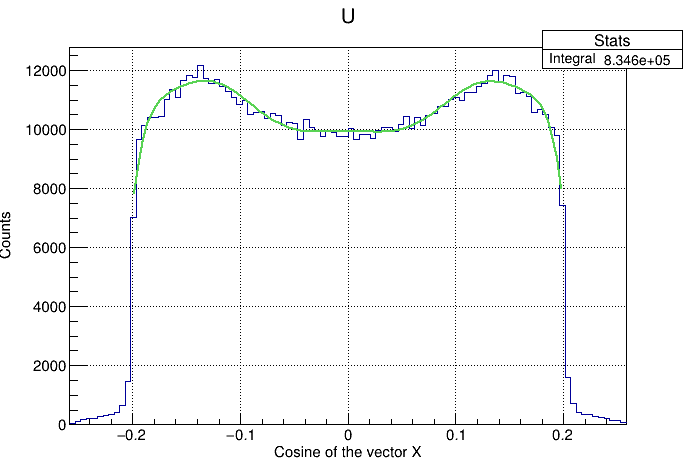

In [15]:
histU = hist.get_hist('U',100)
f_U = TF1("f_U", "pol 10", -0.2, 0.2)

f_U.SetLineColor(8)
c2=TCanvas()
histU.Fit(f_U, 'R')

histU.GetXaxis().SetTitle("Cosine of the vector X")
histU.GetXaxis().CenterTitle(True)
histU.GetYaxis().SetTitle("Counts")
histU.GetYaxis().CenterTitle(True)
gStyle.SetOptStat("in")
randU = histU
c2.SetGrid()
c2.Draw()

 FCN=77722.6 FROM MIGRAD    STATUS=CONVERGED     142 CALLS         143 TOTAL
                     EDM=1.14029e-06    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.84115e+05   3.96364e+02   2.87830e+01  -6.40954e-06
   2  MPV          6.16602e-01   8.50652e-04   6.49267e-05   1.24055e+00
   3  Sigma        2.65414e-01   5.32892e-04   1.77148e-05  -1.01770e+01
 FCN=44.3876 FROM MIGRAD    STATUS=CALL LIMIT   1346 CALLS        1347 TOTAL
                     EDM=0.00479702    STRATEGY= 1  ERROR MATRIX UNCERTAINTY  24.5 per cent
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.13946e+05   1.88993e+04   1.17194e+03  -1.87065e-04
   2  Mean        -8.97302e+00   2.05838e-01  -1.50861e-02  -2.52903e+01
   3  Sigma        4.

Warning in <TROOT::Append>: Replacing existing TH1: Stats (Potential memory leak).
Warning in <Fit>: Abnormal termination of minimization.
Warning in <Fit>: Abnormal termination of minimization.


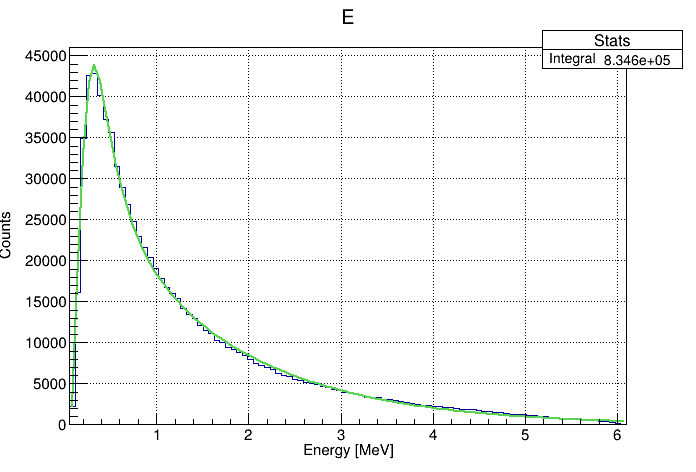

In [16]:
histE = hist.get_hist('E',100)
flandau = TF1("flandau", "landau",-2,df['E'].max())
fgaus1= TF1("fgaus1", "gaus",2,3.5)
fgaus2= TF1("fgaus2", "gaus",3,3.4)


c2=TCanvas()
histE.Fit(flandau, 'R')
histE.Fit(fgaus1, 'R+')
histE.Fit(fgaus2, 'R+')

parN = []
total = TF1( 'total', 'landau(0)+gaus(3)+gaus(6)',df['E'].min(),df['E'].max())

total.SetLineColor(8)
par1 = flandau.GetParameters()
par2 = fgaus1.GetParameters()
par3 = fgaus2.GetParameters()

parN.append(par1[0])
parN.append(par1[1])
parN.append(par1[2])
parN.append(par2[0])
parN.append(par2[1])
parN.append(par2[2])
parN.append(par3[0])
parN.append(par3[1])
parN.append(par3[2])


histE.GetXaxis().SetTitle("Energy [MeV]")
histE.GetXaxis().CenterTitle(True)
histE.GetYaxis().SetTitle("Counts")
histE.GetYaxis().CenterTitle(True)
gStyle.SetOptStat("in")

total.SetParameters(*parN)
histE.Fit( total, 'R' )
randE = total
c2.SetGrid()
c2.Draw()

# Tworzenie i zapisanie modelu

In [28]:
def create_model(function, correlate_matrix):
  n = len(correlate_matrix)
  myfile = TFile.Open("/home/dawid/IAEA/model.root","RECREATE")
  myfile.WriteObject(function[0], "X")
  myfile.WriteObject(function[1], "Y")
  myfile.WriteObject(function[2], "E")
  myfile.WriteObject(function[3], "U")
  myfile.WriteObject(function[4], "V")
  myfile.WriteObject(function[5], "W")
  correlated = TMatrixD(n)
  for i in range(n):
    for j in range(n):
      correlated[i][j] = correlate_matrix[i][j]
  myfile.WriteObject(correlated, "correlate")

In [29]:
function = [randX, randY, randE, randU, randV, randW]
corr = df.corr().to_numpy()
create_model(function, corr)